In [1]:
import pandas as pd#importing the library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Avacado.csv')#load the dataset

# Attributes inside the Avacado dataset


Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


Observation→
    after seen the DataFrame we think its a scaled data

In [4]:
#lets drop the  unnamed column because we do
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
    #lets rename the 4046→small,4225→large,4770→XLalarge according to the bag size(it will help innext)
df=df.rename(columns={"4046":"Small","4225":"Large","4770":"XLarge"})
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small', 'Large', 'XLarge',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:

#check the shape of the dataset
df.shape

(1517, 13)

In [8]:
#describe the dataset
df.describe()

,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


K O → 1.Standard deviation is maxmimun in Xlarge bags 2.minmum avrageprice is 0.49 and maximum avrage price is 1.68

3. In Total bags,small bags,xlarge bags columns the difference between 75% and max is more so may be some outliers
    are present inside those columns

In [9]:
#now look for the information about that data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   Small         1517 non-null   float64
 4   Large         1517 non-null   float64
 5   XLarge        1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


Here we can see that Date datatype is object not in date time ,
so we have to sort them by date-month-year for a better analysis


In [10]:
import datetime
dates = [datetime.datetime.strptime(g, "%d-%m-%Y") for g in df['Date']]
dates.sort()
sorteddates = [datetime.datetime.strftime(h, "%Y-%m-%d") for h in dates]
df['Date'] = pd.DataFrame({'Date':sorteddates})
df['Year'], df['Month'],df['Day'] = df['Date'].str.split('-').str

df.head(10)
#now we sroted the data data date-mont-year 

,Date,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-01-04,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,01,04
1,2015-01-04,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,01,04
2,2015-01-04,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,01,04
3,2015-01-04,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,01,04
4,2015-01-04,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,01,04
5,2015-01-04,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,2015,01,04
6,2015-01-04,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,2015,01,04
7,2015-01-04,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,2015,01,04
8,2015-01-04,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,2015,01,04
9,2015-01-04,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,2015,01,04


In [11]:
#lets drop useless columns
df.drop(['year','Date'],axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,01,04
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,01,04
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,01,04
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,01,04
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,01,04


In [12]:
#checking the uniques region
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [13]:
df["region"].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

# Handelling the null value

In [14]:
#check the null value
df.isnull().sum()

AveragePrice    0
Total Volume    0
Small           0
Large           0
XLarge          0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
Year            0
Month           0
Day             0
dtype: int64

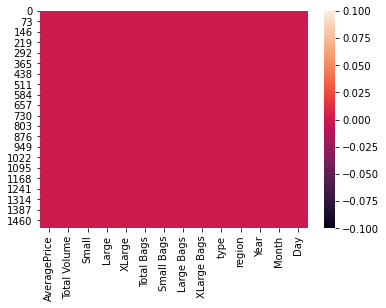

In [15]:
#lets plot this above result for better result
sns.heatmap(df.isnull())

K O →
     ¶after seen the above plot we can say threr is no null value are present, 
        If there were any ,we would've noticed in figure represented by different colour shade

In [16]:
#checking the correlation
df.corr()

,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717
Small,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063
Large,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718
XLarge,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000


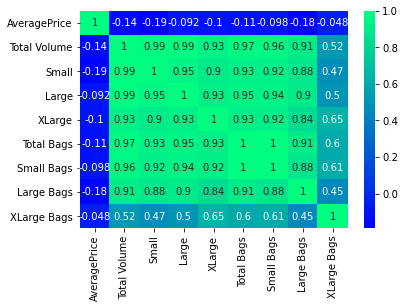

In [17]:
#lets plot with heatmap for beter visualization
sns.heatmap(df.corr(),annot=True,cmap="winter")

K O→ 1.all columns are highly correlated to each other except Average price

# skewness of the data

In [18]:
#checking the skew ness of data
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
Small           6.051830
Large           6.394926
XLarge          5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
Year            1.828332
Month           0.233418
Day             0.027740
dtype: float64

In [19]:
#detecting the int/float data 
d=df.columns
for i in d:
    if df[i].dtypes=="object":
        print(df[i].head(0))
        

Series([], Name: type, dtype: object)
Series([], Name: region, dtype: object)
Series([], Name: Year, dtype: object)
Series([], Name: Month, dtype: object)
Series([], Name: Day, dtype: object)


In [20]:
df1=df.copy()#creating a duplicate datset for ploting the skewness as numeric data
df1.shape


(1517, 14)

In [21]:
df1.drop(['Day','Year','Month','type','region'],axis=1,inplace=True)#droping the objective columns

In [22]:
df1.shape#checking the sahape

(1517, 9)

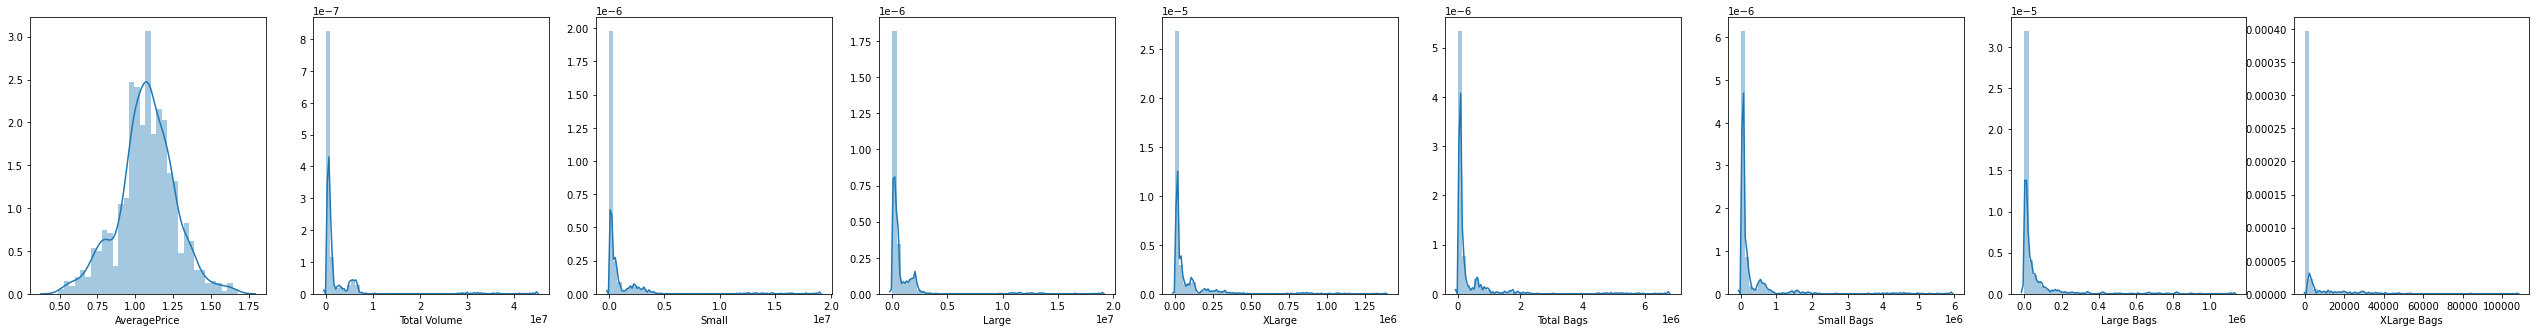

In [23]:
#finally ploting the skeweddata
collist=df1.columns.values
ncol=12
nrows=10
plt.figure(figsize=(5*ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

KO → from the above ▲ chart we can see that except Avragepriceprice all columns have right skewed data

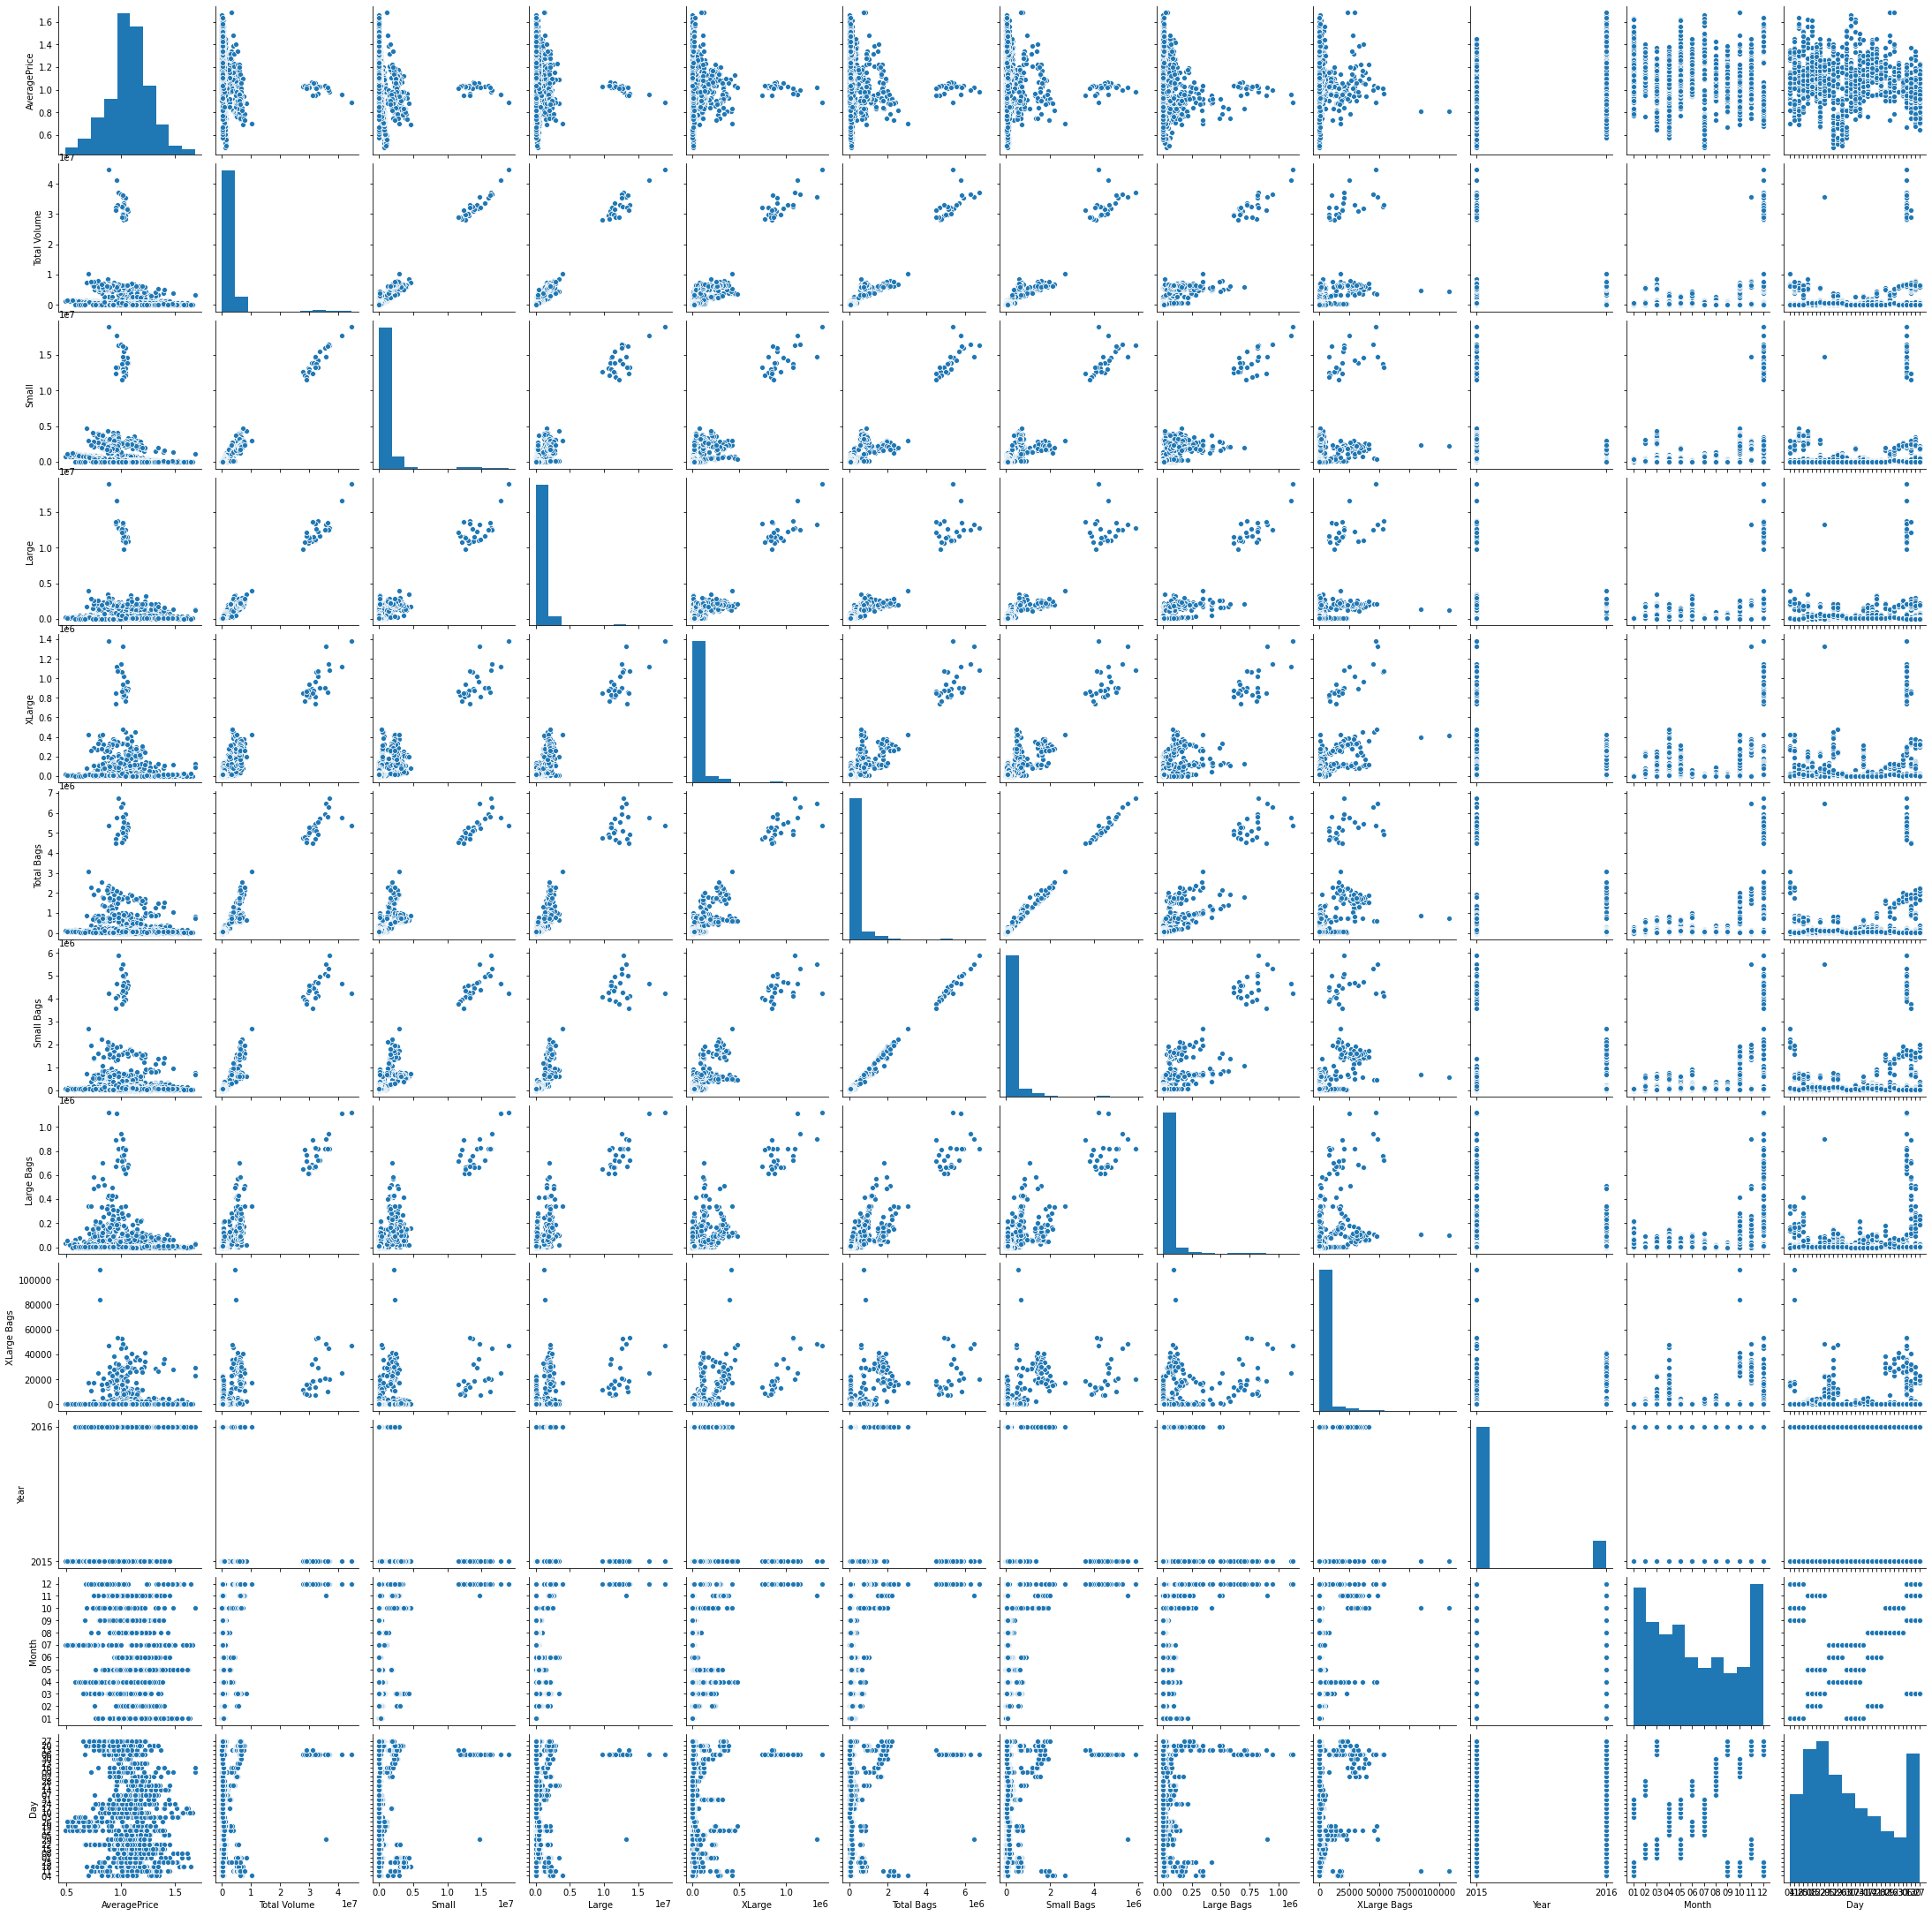

In [24]:
sns.pairplot(df)

# Data visualization
     Univariate analysis

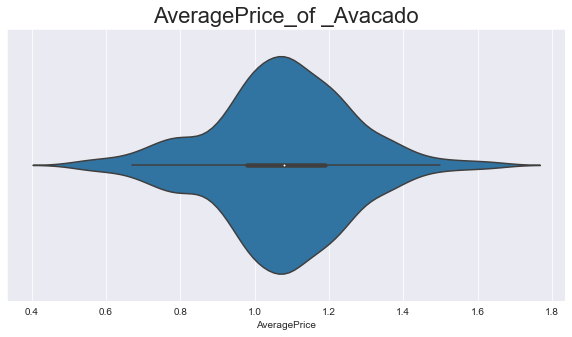

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.violinplot(df["AveragePrice"])
plt.title("AveragePrice_of _Avacado",{"fontsize":22})
plt.show()


Ko →.
    most of the average price are comming between 1.0 to 1.2

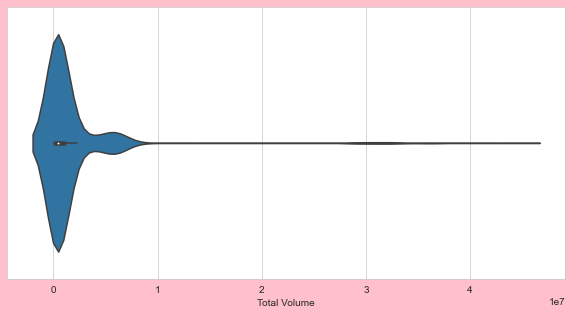

In [26]:
sns.set_style("whitegrid")
plt.figure(facecolor="pink",figsize=[10,5])
sns.violinplot(x="Total Volume",data=df)
plt.show()


KO→
   most total volumes are below 1

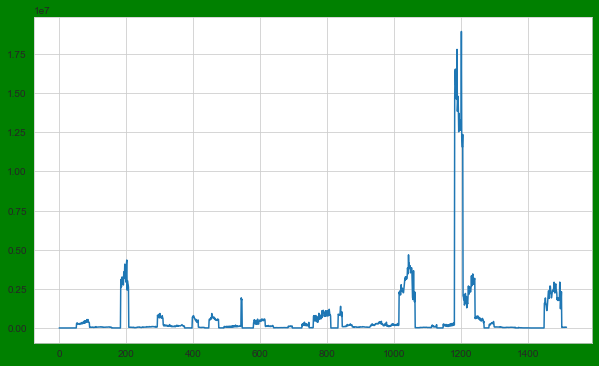

In [27]:
plt.figure(facecolor="green",figsize=[10,6])
df['Small'].plot.line()
plt.show()

ko→
   Row#1200 have more average price of small size Avacado

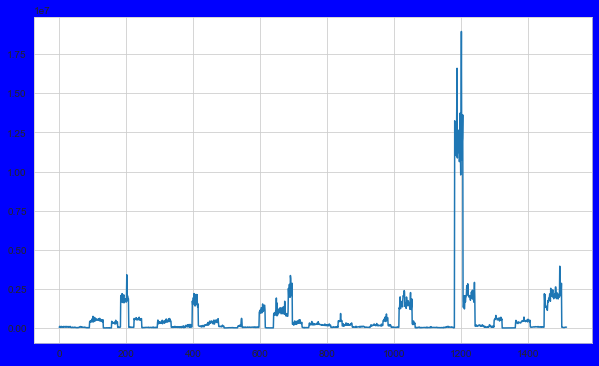

In [28]:
plt.figure(facecolor="blue",figsize=[10,6])
df['Large'].plot.line()
plt.show()

ko→
   Row#1200 have more average price of large size Avacado

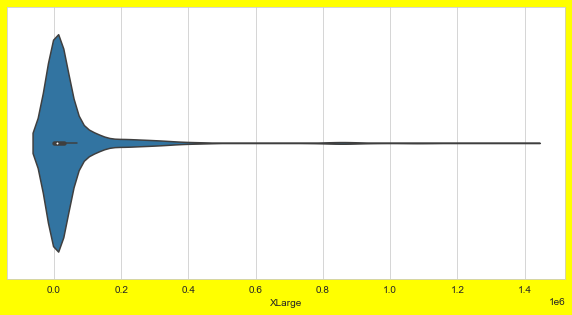

In [29]:
sns.set_style("whitegrid")
plt.figure(facecolor="yellow",figsize=[10,5])
sns.violinplot(x="XLarge",data=df)

ko→most of the Xlarge pcs are sales wityh the average price between 0.00 to 0.10

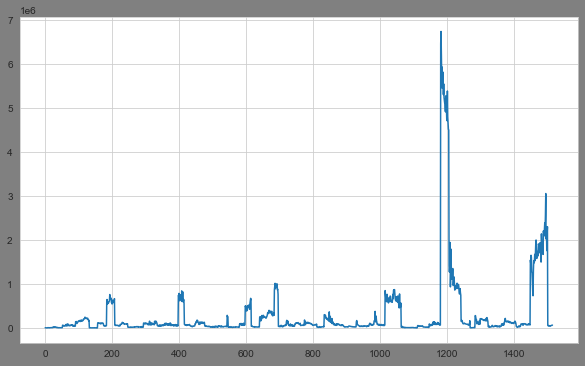

In [30]:
plt.figure(facecolor="grey",figsize=[10,6])
df['Total Bags'].plot.line()
plt.show()

ko→
   row#1190 have more no of total bags
    
    

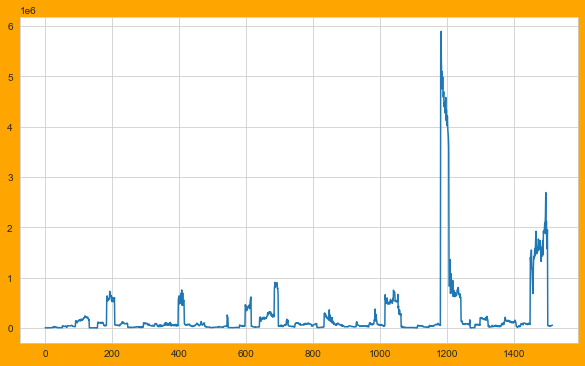

In [31]:
plt.figure(facecolor="orange",figsize=[10,6])
df['Small Bags'].plot.line()
plt.show()

ko→
  row#1190 have more no of small bags

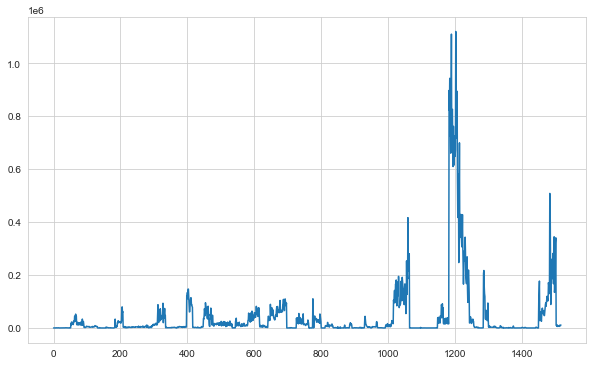

In [32]:
plt.figure(figsize=[10,6])
df['Large Bags'].plot.line()
plt.show()

ko→ row#1200 have more no of small bags

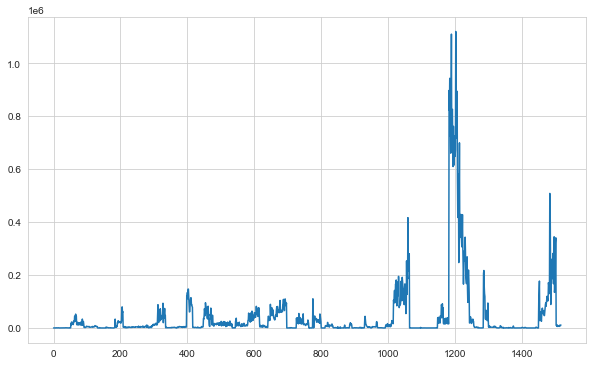

In [33]:
plt.figure(figsize=[10,6])
df['Large Bags'].plot.line()
plt.show()

ko→ row#1200 have more no of Large bags

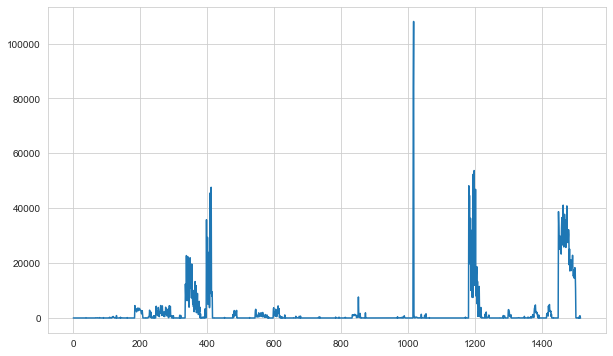

In [34]:
plt.figure(figsize=[10,6])
df['XLarge Bags'].plot.line()
plt.show()

K O →row 1110 have more xlarge bgas

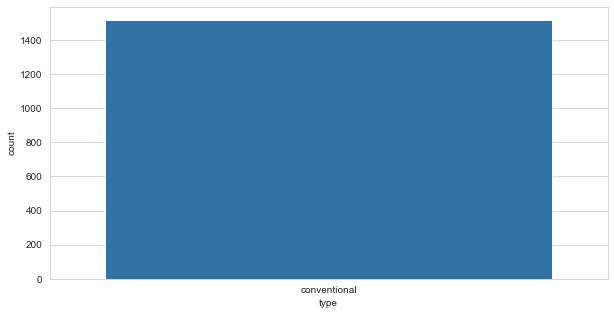

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='type',data=df)

ko →
 we have only one type of Avacado 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

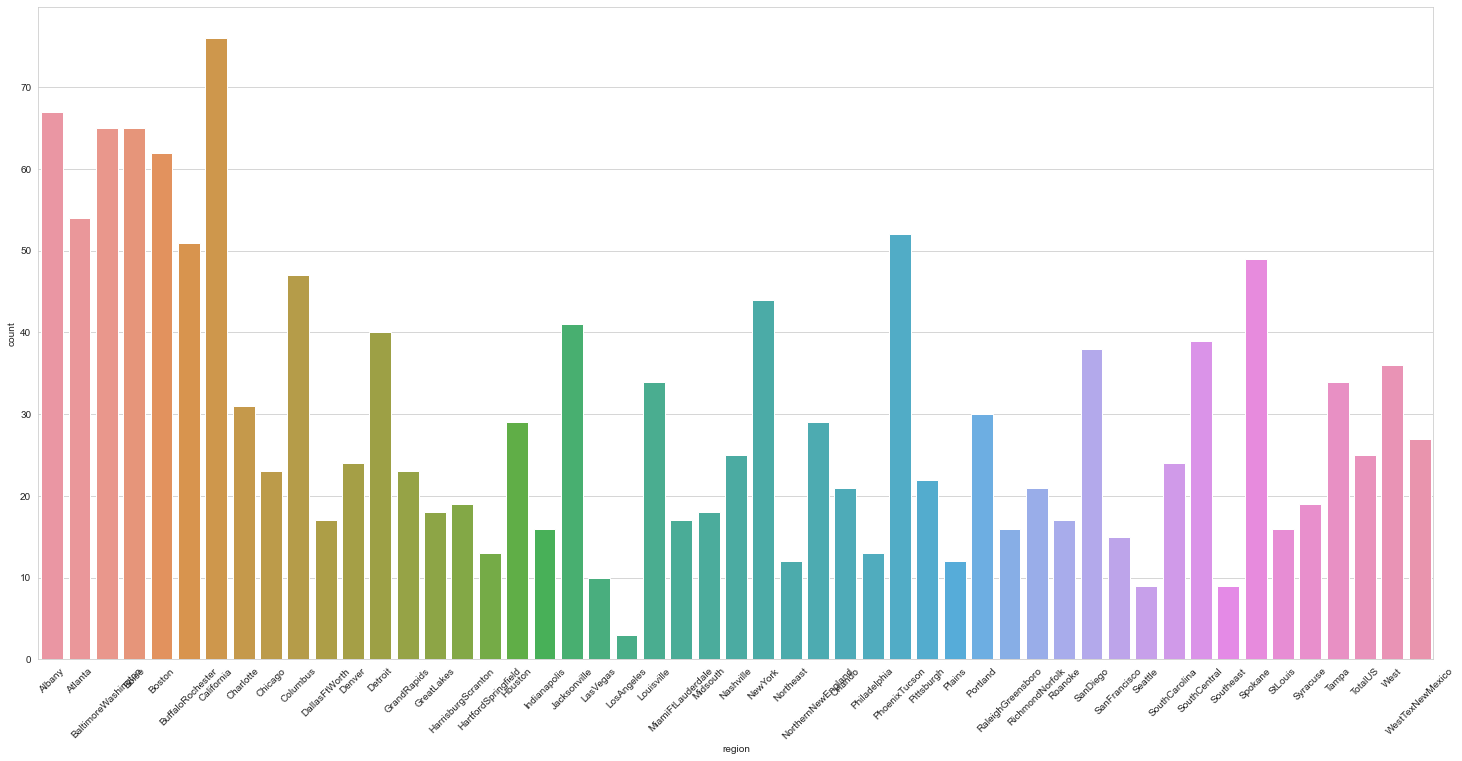

In [36]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 45)

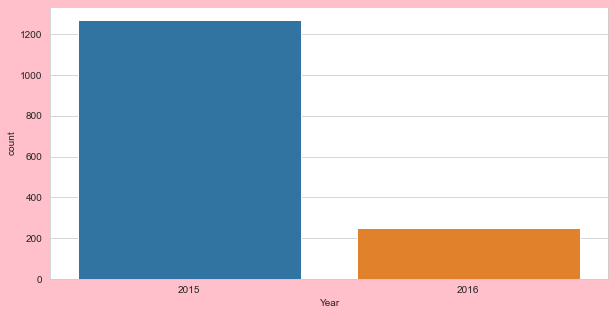

In [37]:
sns.set_style("whitegrid")
plt.figure(facecolor="pink",figsize=[10,5])
sns.countplot(x="Year",data=df)

ko→
   1→most of the avrage comes inside the year of 2015

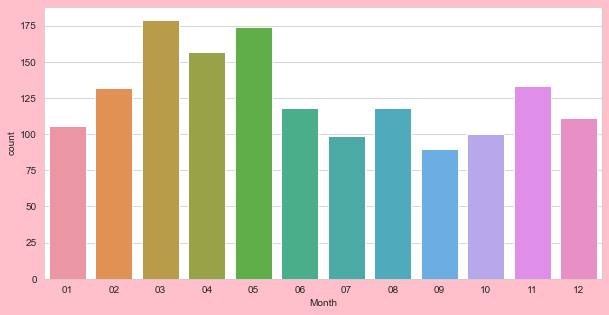

In [38]:
sns.set_style("whitegrid")
plt.figure(facecolor="pink",figsize=[10,5])
sns.countplot(x="Month",data=df)

# k o →
     1.Most of the Avacado sles in Month of march and may 

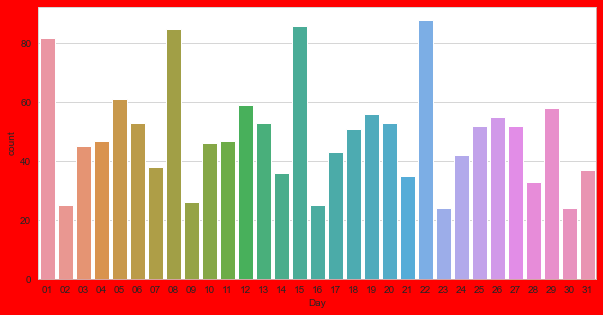

In [39]:
sns.set_style("whitegrid")
plt.figure(facecolor="red",figsize=[10,5])
sns.countplot(x="Day",data=df)

k o→
     most of the Avacado seals in the date of 01,08,15 and 22

# Bivariate analysis

Text(0.5, 1.0, 'region wise average price')

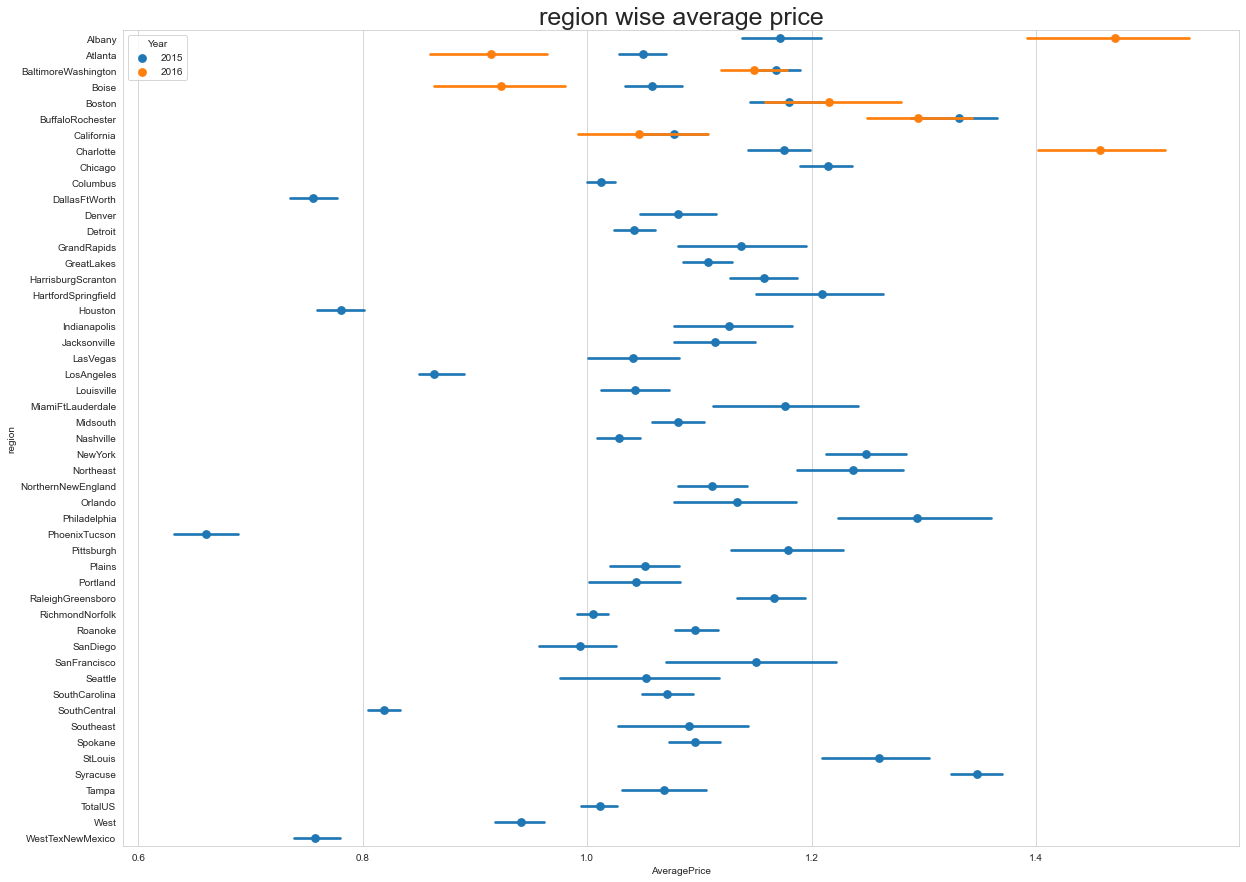

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=[20,15])
sns.pointplot(x='AveragePrice',y='region',data=df,hue='Year', join=False)
plt.title('region wise average price',{"fontsize":25})


ko→ 
  the average price are changing on different Region respect to year

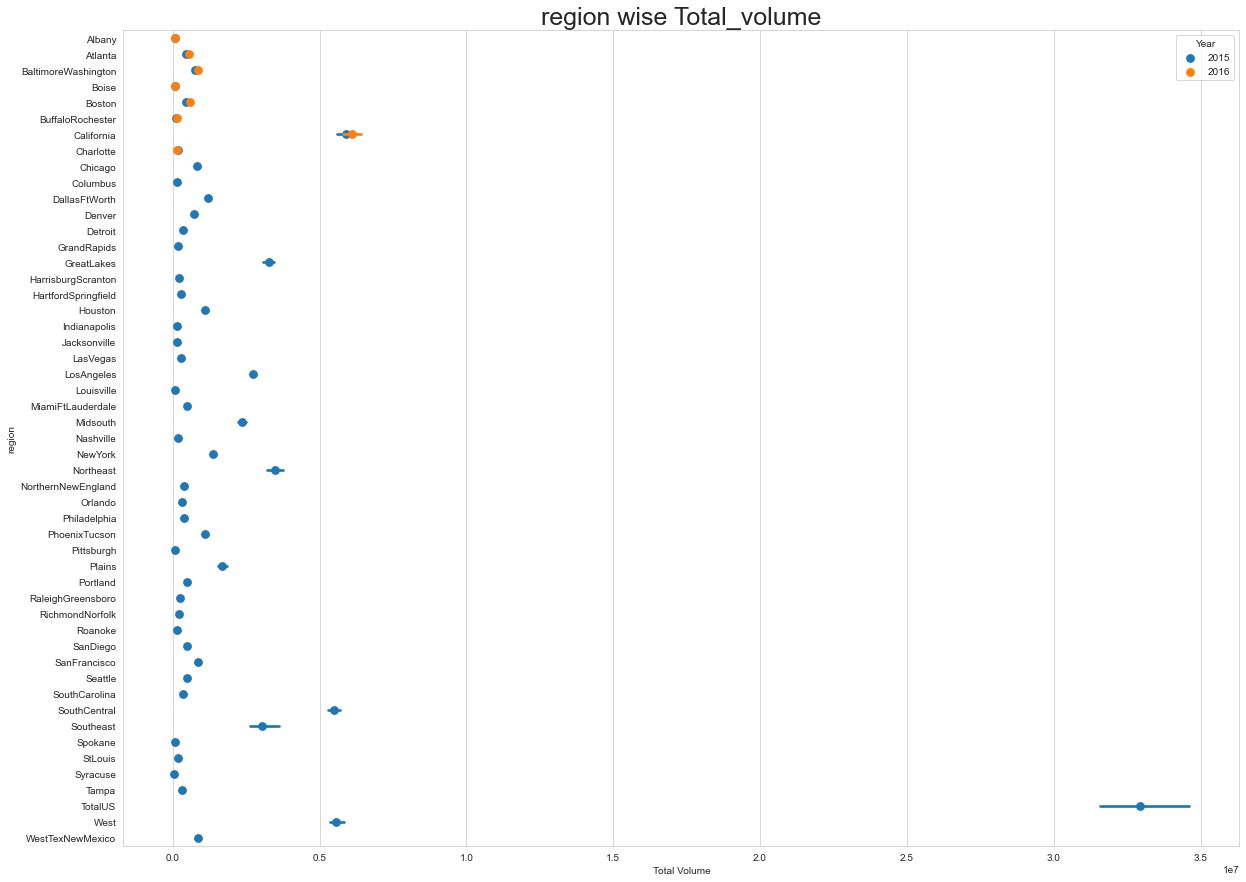

In [41]:
plt.figure(figsize=[20,15])
sns.pointplot(x='Total Volume',y='region',data=df,hue='Year', join=False)
plt.title('region wise Total_volume',{"fontsize":25})
plt.show()

K O→
 Here how the total volume is changing  yearly respect to Region

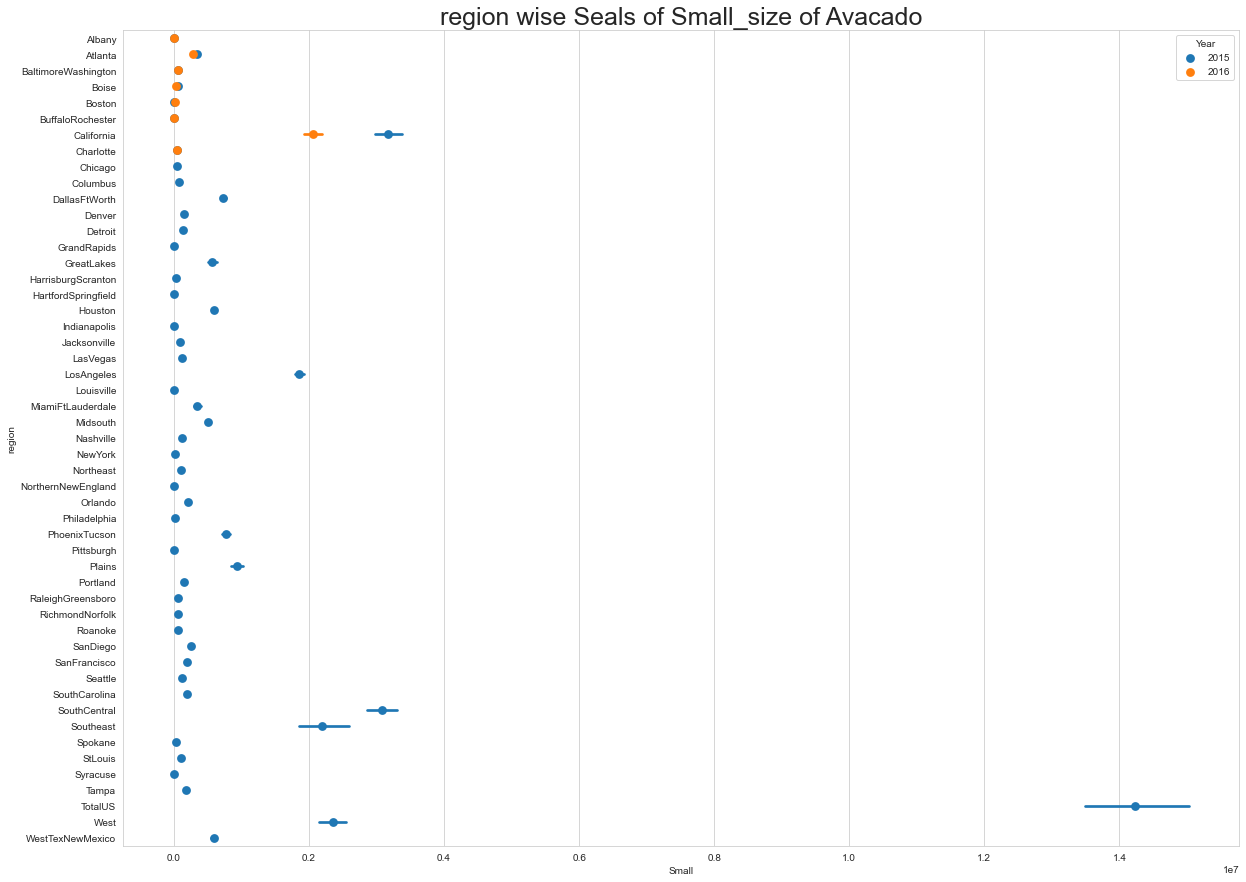

In [42]:
plt.figure(figsize=[20,15])
sns.pointplot(x='Small',y='region',data=df,hue='Year', join=False)
plt.title('region wise Seals of Small_size of Avacado',{"fontsize":25})
plt.show()
#Below chart saying that how  region wise Seals of Small_size of Avacado

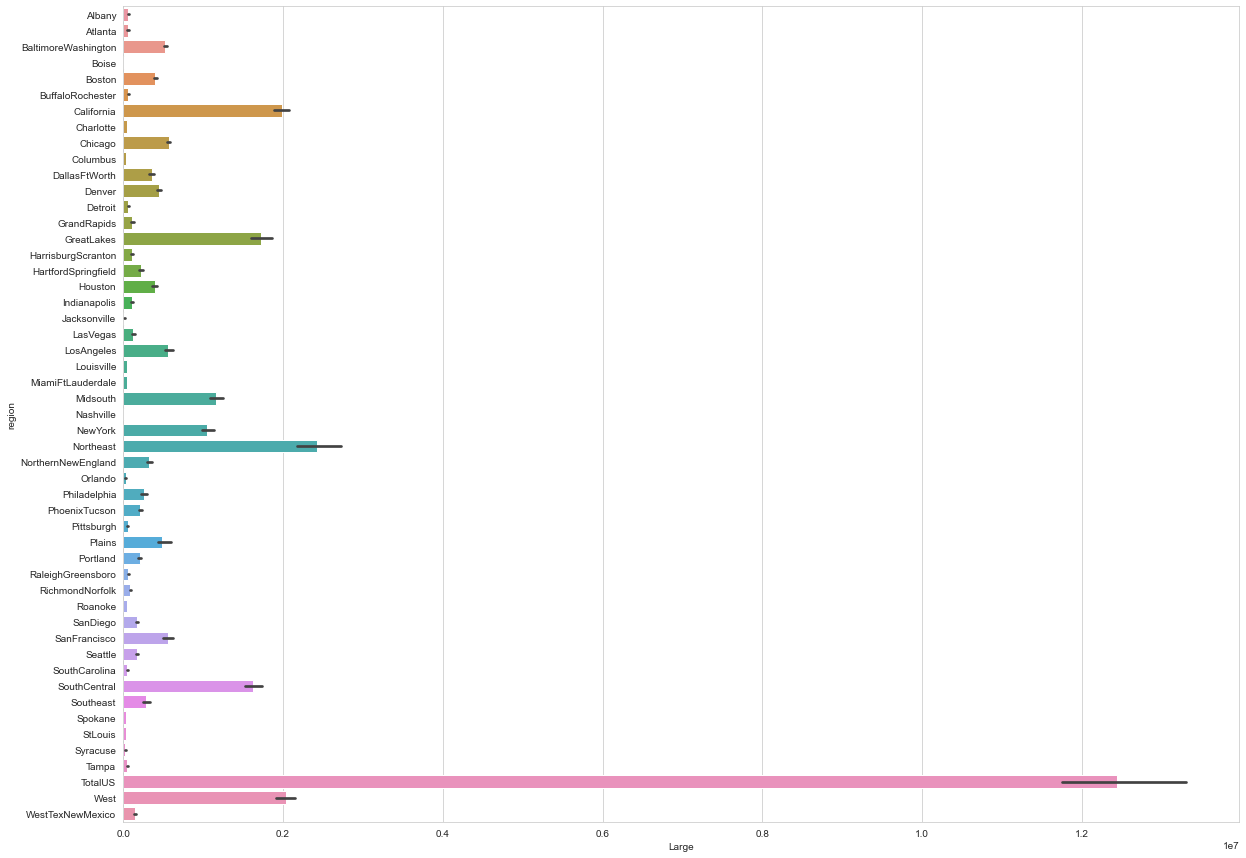

In [43]:
plt.figure(figsize=[20,15])
sns.barplot(x="Large",y="region",data=df)
plt.show()
#Below chatr says thatHow much the Large size of Avacado are sales in respect to region

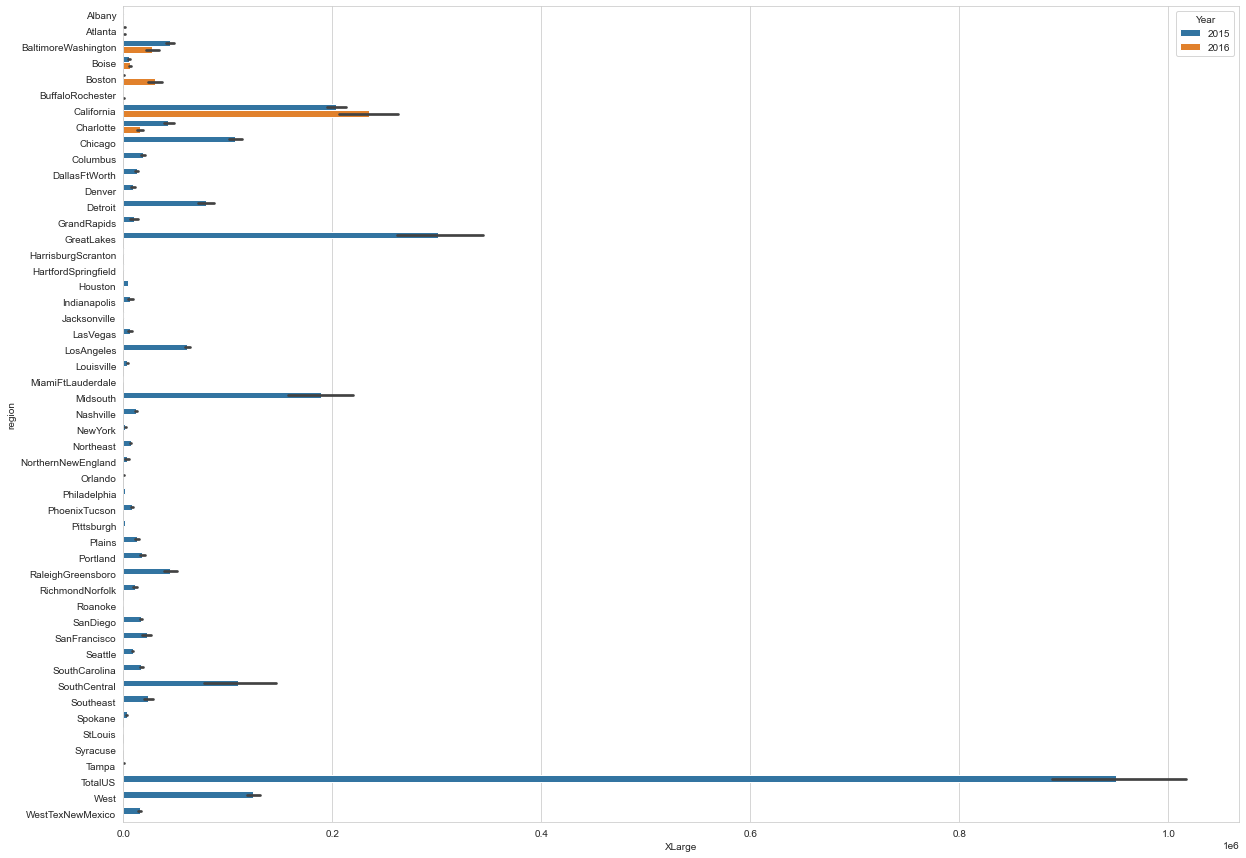

In [44]:
plt.figure(figsize=[20,15])
sns.barplot(x="XLarge",y="region",hue="Year",data=df)
plt.show()
#Below chatr says thatHow much the Large size of Avacado are sales in diffrent kind of  region respect to year

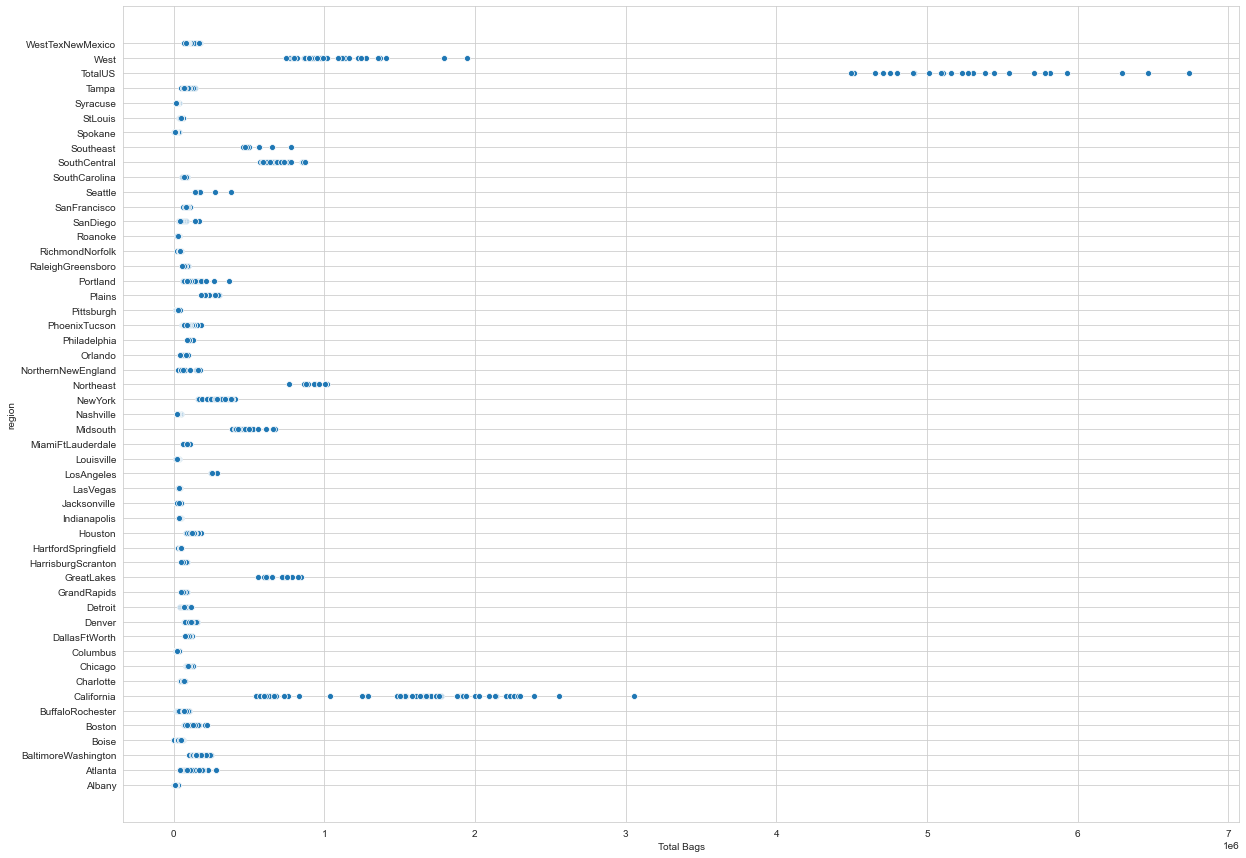

In [45]:
plt.figure(figsize=[20,15])
sns.scatterplot(x="Total Bags",y="region",data=df)

k o→
  on the above chart is showing that total bags respect to region
   

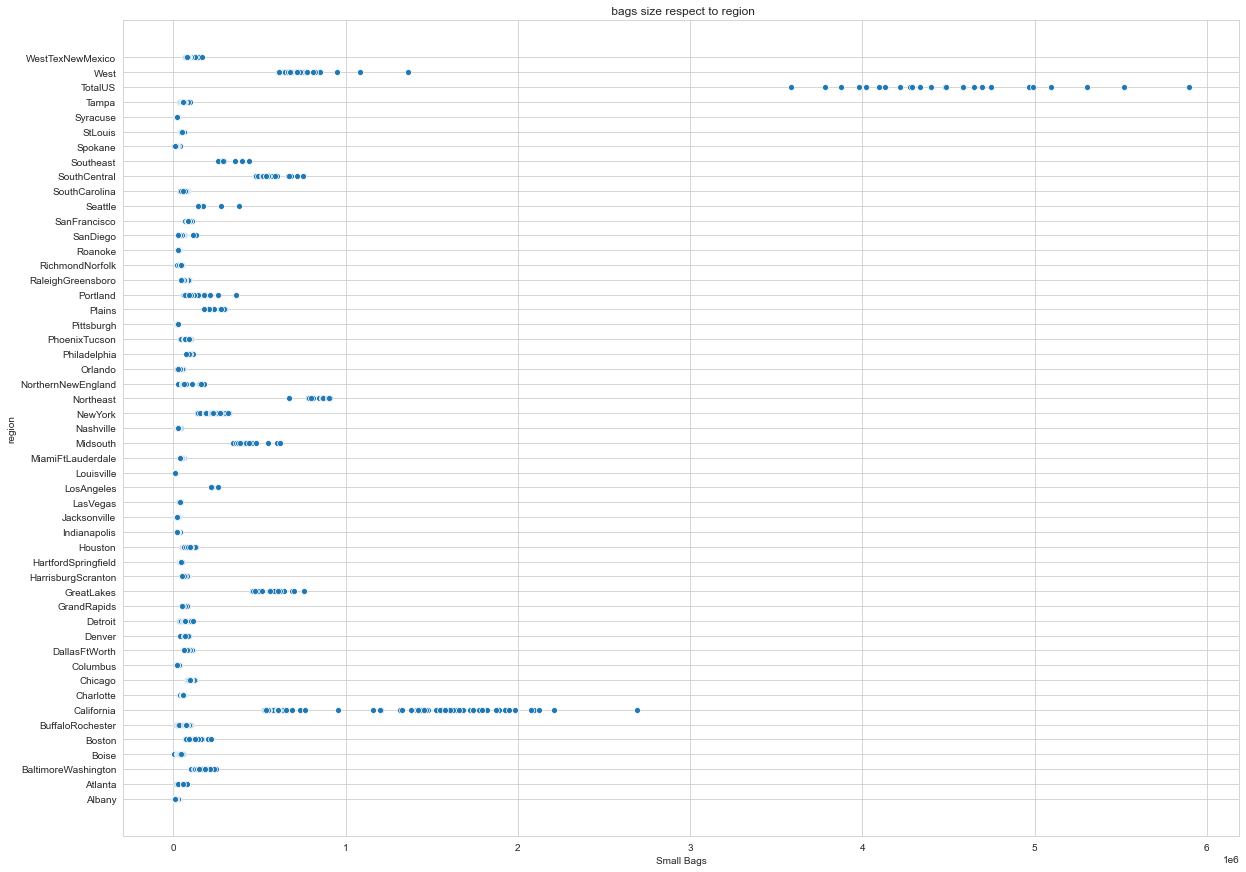

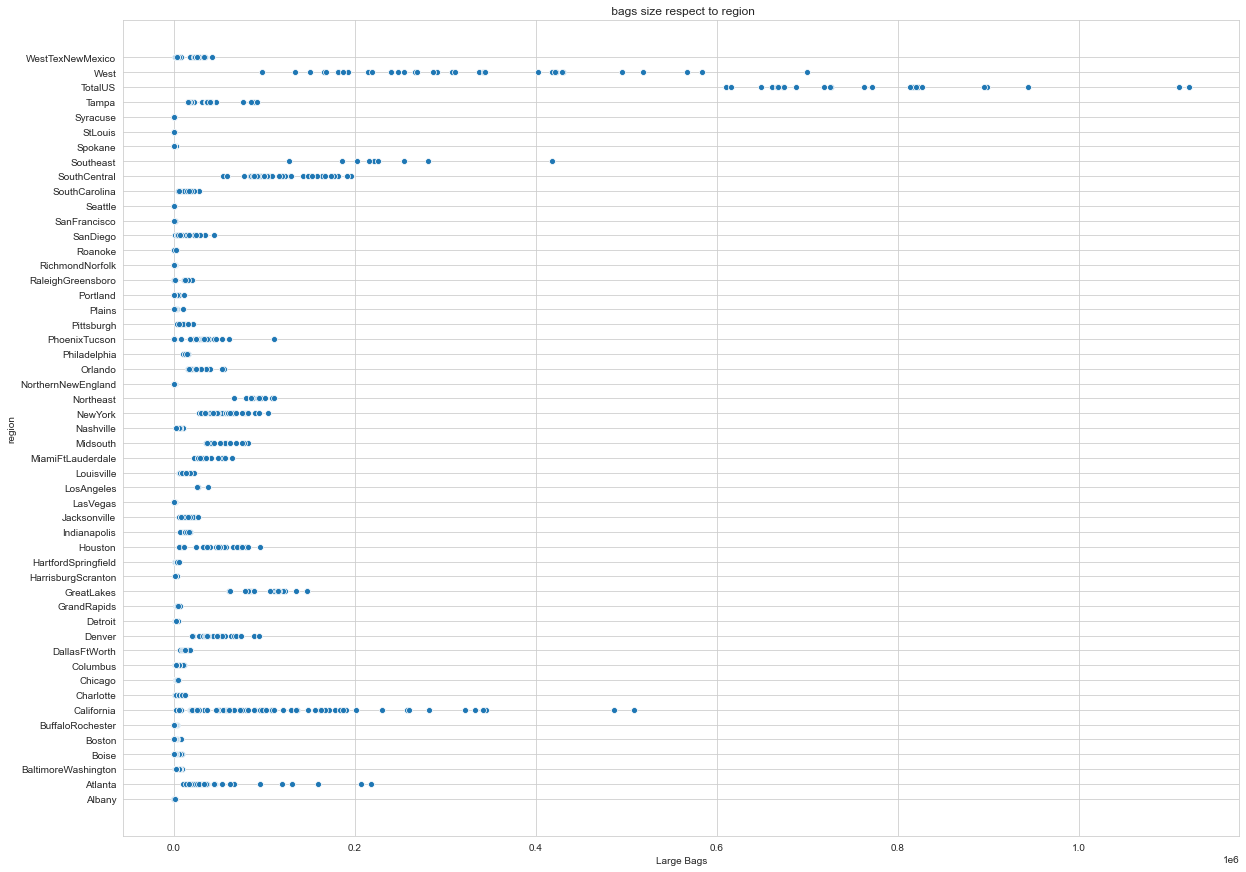

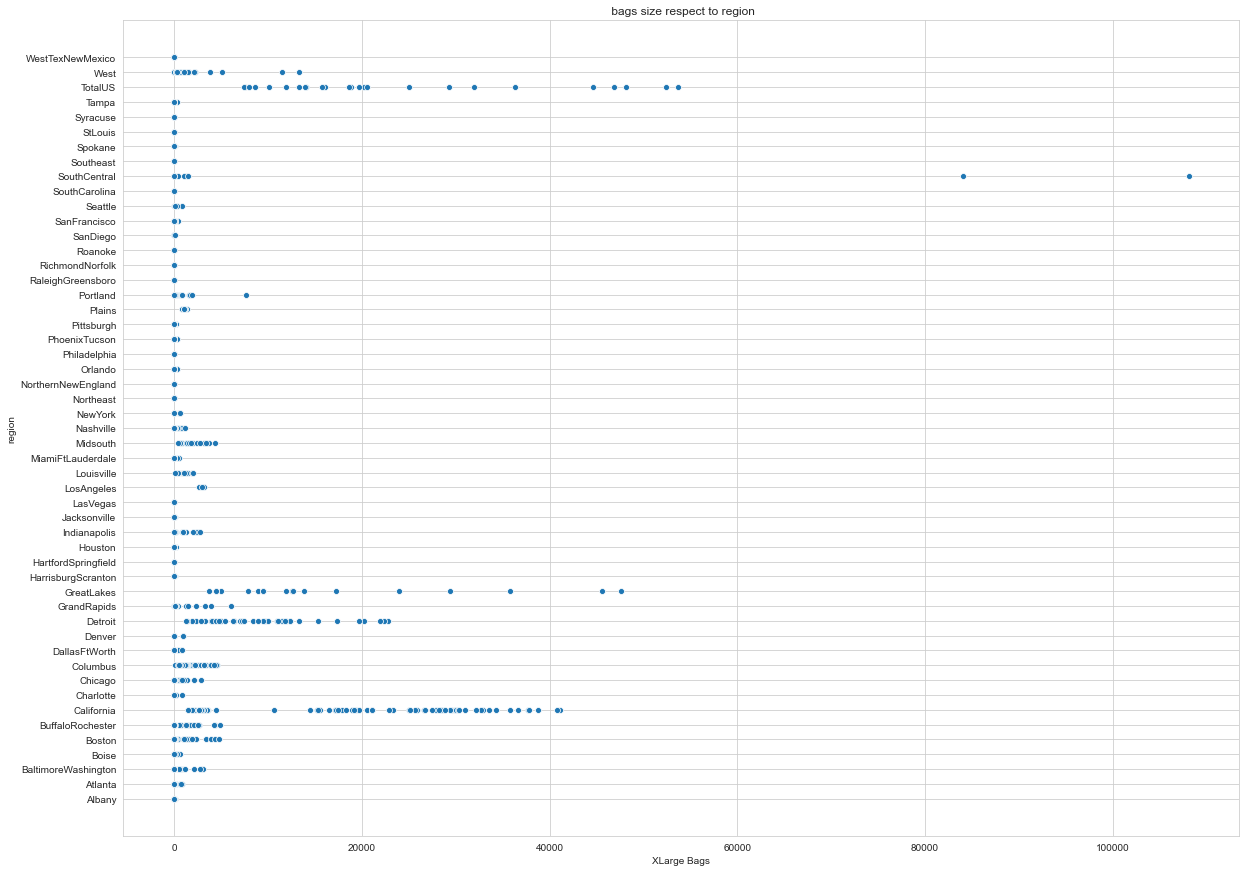

In [46]:
m=["Small Bags","Large Bags","XLarge Bags"]
for i in m:
    plt.figure(figsize=[20,15])
    sns.scatterplot(x=df[i],y="region",data=df)
    plt.title(" bags size respect to region")
    #Below charts mentiion Bags sizes respects to region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

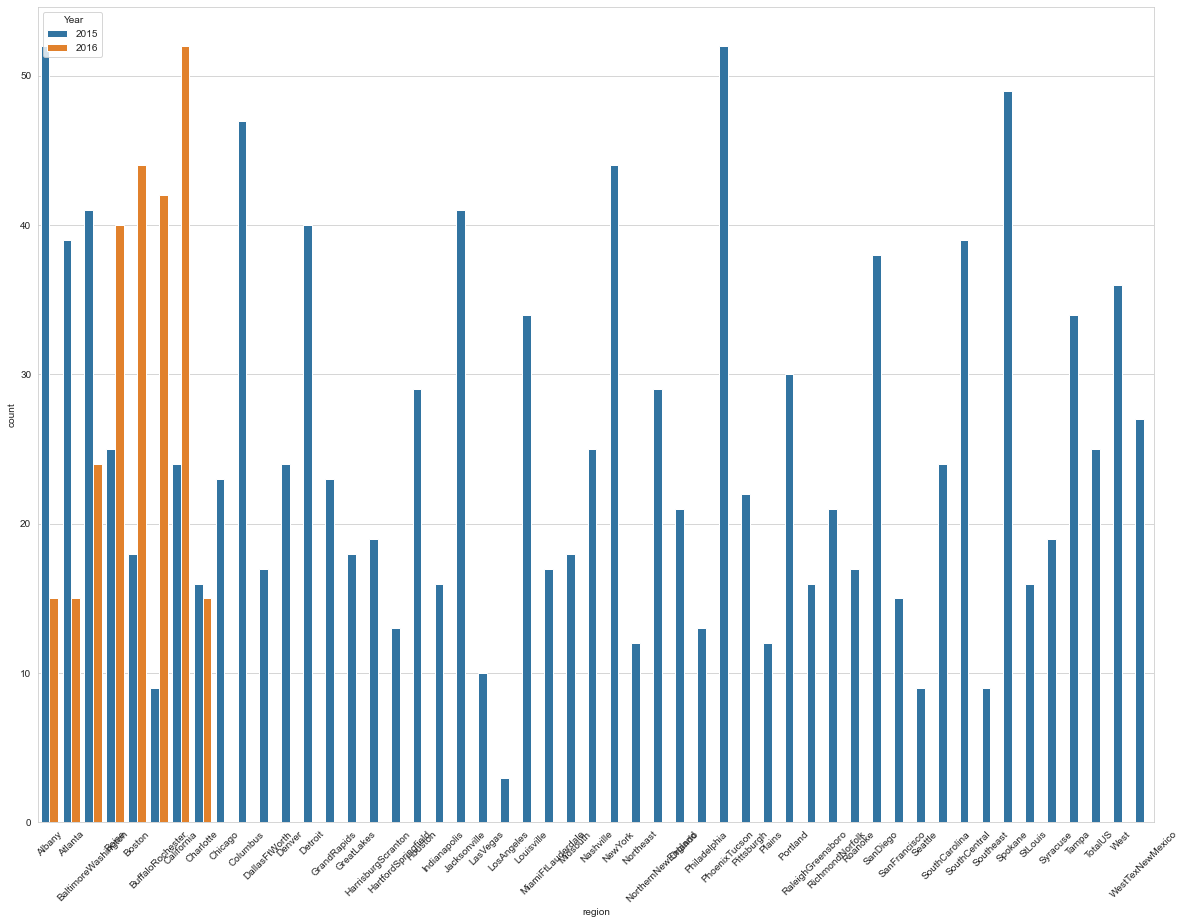

In [47]:
plt.figure(figsize=[20,15])
sns.countplot(x="region",hue="Year",data=df)
plt.xticks(rotation = 45)

K O →
     Above chart shwoing that Sales in each region respect to years

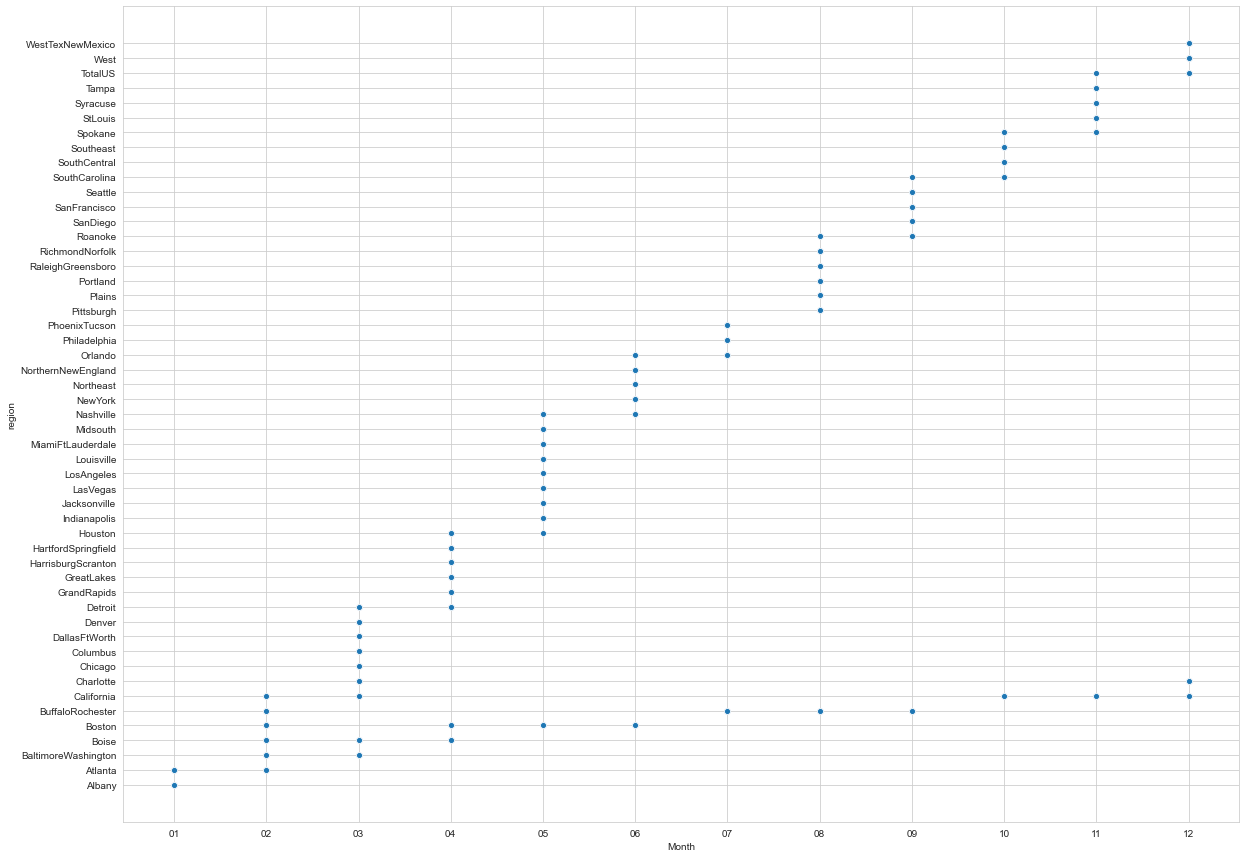

In [48]:
plt.figure(figsize=[20,15])
sns.scatterplot(x="Month",y="region",data=df)
plt.show()

k o →
 sales of each month respect to region

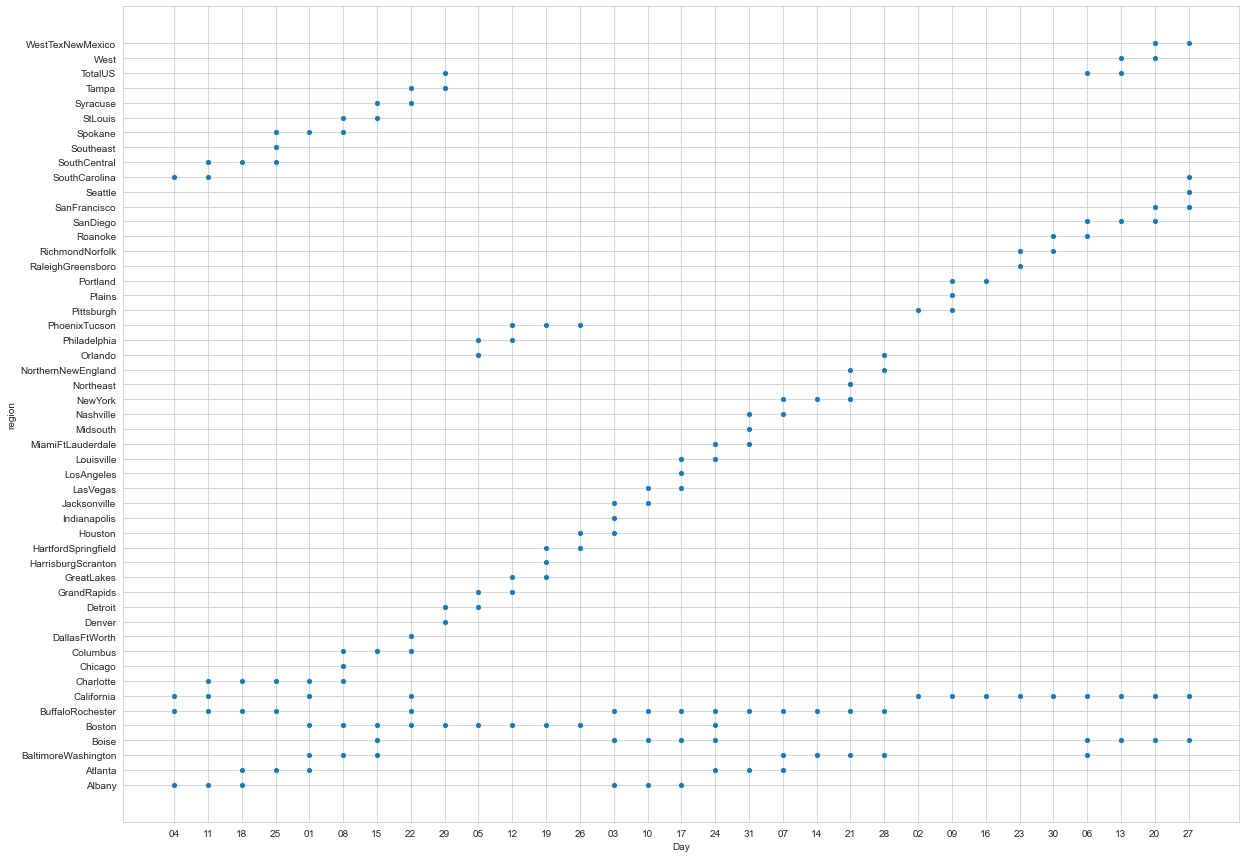

In [49]:
plt.figure(figsize=[20,15])
sns.scatterplot(x="Day",y="region",data=df)
plt.show()

k o → sales of each Day respect to region

Separet into input and output variable

In [50]:
df_x=df.drop(columns=['region'])
y=df[['region']]

In [51]:
#removing the skewness of the data
f=df.columns
for i in f:
    if df[i].dtypes!='object':
        if df[i].skew()>0.55:
            df[i]=np.log(df[i])

# Data preprocessing

In [52]:
#we have some object dtypes of data in our input variable
#lets covert to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d=df_x.columns
for i in d:
    if df_x[i].dtypes=="object":
        df_x[i]=le.fit_transform(df_x[i])

In [53]:
#scalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [54]:
#In this data set we know that out target variable Region is classifier so we are going to take Logistic regresson
#lets make a function for getting the best random_satae for a model toget better accuracy(accuracy_score)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
def max_acc_score(rgr,x,y):
    max_acc=0
    for rd in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
        rgr.fit(x_train,y_train)
        prd=rgr.predict(x_test)
        acc=accuracy_score(y_test,prd)
        if acc>max_acc:
            max_acc=acc
            final_rd=rd
        
    print("max ccuracy score coresponding to ",final_rd,"♫is♫",max_acc*100)
    return final_rd

In [55]:
def PLT(md,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=accuracy_score(y_test,pre)
    print(acc)
    cm=confusion_matrix(y_test,pre)
    print()
    print()
    print(cm)
    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")

In [56]:
#lets make a function for cross_val_score
from sklearn.model_selection import cross_val_score   
def k(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="accuracy")
    print("mean accuracy score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())

In [57]:
#lets make a function for accuracy storage
def acc(md,ac,n):
    d=pd.DataFrame({"MODEL":[md],"ACCURACY":[ac]},index={n})
    return d

In [58]:
#lets start with logistic regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc_score(lg,x,y)

max ccuracy score coresponding to  74 ♫is♫ 83.55263157894737


74

In [59]:
#storage accuracy score  in the result dataFrame
result=acc(lg,83.55263157894737,1)
result

,MODEL,ACCURACY
1,LogisticRegression(),83.552632


In [60]:
PLT(lg,x,y,74)

0.8355263157894737


[[13  1  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  5]]



                     precision    recall  f1-score   support

             Albany       0.93      0.93      0.93        14
            Atlanta       0.92      1.00      0.96        12
BaltimoreWashington       1.00      0.82      0.90        11
              Boise       1.00      1.00      1.00         8
             Boston       0.86      0.86      0.86        14
   BuffaloRochester       0.75      0.67      0.71         9
         California       1.00      1.00      1.00        16
          Charlotte       0.33      0.50      0.40         4
            Chicago       1.00      1.00      1.00         4
           Columbus       0.85      1.00      0.92        11
      DallasFtWorth       1.00      1.00      1.00         6
             Denver       1.00      1.00      1.00         8
            Detroit       

In [61]:
k(lg,x,y)#cross validation of logistic regression

mean accuracy score for  LogisticRegression() 0.7152813965607085
Standard deviation  in accuracy score for  LogisticRegression() 0.05852243483354404

******************************************************
After seen the cross validation score of LogisticRegression() the accuracy score mean is 0.7152813965607085


In [62]:
lgc=acc("LogisticRegression cvs mean",0.7152813965607085,2)
result=pd.concat([result,lgc])
result=result[["MODEL","ACCURACY"]]
result

,MODEL,ACCURACY
1,LogisticRegression(),83.552632
2,LogisticRegression cvs mean,0.715281


In [63]:
#lets go with support vector classifier
from sklearn.svm import SVC
from sklearn.model_selection import *
svc=SVC()
parameters={"kernel":["poly","rbf","linear"],"C":[0.0001,0.001,0.01,0.1,1]}
Gs=GridSearchCV(svc,parameters,cv=5,scoring="accuracy")
Gs.fit(x,y)
Gs.best_params_#finding the best parameters with Gridsearchcv

{'C': 1, 'kernel': 'linear'}

In [64]:
#finding the best random state foe best accuracy
sv=SVC(C=1,kernel="linear")
max_acc_score(sv,x,y)

max ccuracy score coresponding to  96 ♫is♫ 96.38157894736842


96

In [65]:
#storaging in result dataframe
s=acc(svc,96.38157894736842,3)
result=pd.concat([result,s])
result=result[["MODEL","ACCURACY"]]
result

,MODEL,ACCURACY
1,LogisticRegression(),83.552632
2,LogisticRegression cvs mean,0.715281
3,SVC(),96.381579


In [66]:
PLT(sv,x,y,96)#cheking the confusion matrix and classification matrix

0.9638157894736842


[[18  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0  6]]



                     precision    recall  f1-score   support

             Albany       1.00      1.00      1.00        18
            Atlanta       1.00      1.00      1.00        15
BaltimoreWashington       1.00      1.00      1.00        12
              Boise       1.00      1.00      1.00        13
             Boston       1.00      1.00      1.00        12
   BuffaloRochester       1.00      1.00      1.00        11
         California       1.00      1.00      1.00        14
          Charlotte       1.00      1.00      1.00         7
            Chicago       1.00      1.00      1.00         2
           Columbus       0.80      1.00      0.89         4
      DallasFtWorth       1.00      1.00      1.00         2
             Denver       1.00      1.00      1.00         5
            Detroit       

In [67]:
#cross validation of svc
k(sv,x,y)

mean accuracy score for  SVC(C=1, kernel='linear') 0.8669272190376933
Standard deviation  in accuracy score for  SVC(C=1, kernel='linear') 0.08515006954085226

******************************************************
After seen the cross validation score of SVC(C=1, kernel='linear') the accuracy score mean is 0.8669272190376933


In [68]:
#storage in result dataframe
svk=acc("SVC CVS mean",0.8669272190376933,4)
result=pd.concat([result,svk])
result=result[["MODEL","ACCURACY"]]
result

,MODEL,ACCURACY
1,LogisticRegression(),83.552632
2,LogisticRegression cvs mean,0.715281
3,SVC(),96.381579
4,SVC CVS mean,0.866927


In [69]:
#lets take the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={"n_jobs":range(1,30),"n_neighbors":range(0,100)}
Gk=GridSearchCV(kn,parameters,cv=5,scoring="accuracy")
Gk.fit(x,y)
Gk.best_params_#finding the best hyperparameter with Gridsearchcv

{'n_jobs': 1, 'n_neighbors': 1}

In [70]:
#Finding the best random_state for best accuracy score
knn=KNeighborsClassifier(n_jobs=1,n_neighbors=1)
max_acc_score(knn,x,y)

max ccuracy score coresponding to  68 ♫is♫ 98.35526315789474


68

In [71]:
ks=acc(kn,98.35526315789474,5)
result=pd.concat([result,ks])
result=result[["MODEL","ACCURACY"]]
result

,MODEL,ACCURACY
1,LogisticRegression(),83.552632
2,LogisticRegression cvs mean,0.715281
3,SVC(),96.381579
4,SVC CVS mean,0.866927
5,KNeighborsClassifier(),98.355263


In [72]:
PLT(knn,x,y,68)

0.9835526315789473


[[20  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  6]]



                     precision    recall  f1-score   support

             Albany       1.00      1.00      1.00        20
            Atlanta       1.00      1.00      1.00        12
BaltimoreWashington       1.00      1.00      1.00        10
              Boise       1.00      1.00      1.00         8
             Boston       1.00      1.00      1.00        16
   BuffaloRochester       1.00      1.00      1.00         9
         California       1.00      1.00      1.00        14
          Charlotte       1.00      1.00      1.00         6
            Chicago       1.00      1.00      1.00         2
           Columbus       1.00      0.88      0.93         8
      DallasFtWorth       1.00      1.00      1.00         4
             Denver       1.00      1.00      1.00         6
            Detroit       

In [73]:
#cross validation of knn classifier
k(knn,x,y)

mean accuracy score for  KNeighborsClassifier(n_jobs=1, n_neighbors=1) 0.8734779398992532
Standard deviation  in accuracy score for  KNeighborsClassifier(n_jobs=1, n_neighbors=1) 0.0868844006313885

******************************************************
After seen the cross validation score of KNeighborsClassifier(n_jobs=1, n_neighbors=1) the accuracy score mean is 0.8734779398992532


In [74]:
kscv=acc("KNeighborsClassifier CVS mean", 0.8734779398992532,6)
result=pd.concat([result,kscv])
result=result[["MODEL","ACCURACY"]]
result

,MODEL,ACCURACY
1,LogisticRegression(),83.552632
2,LogisticRegression cvs mean,0.715281
3,SVC(),96.381579
4,SVC CVS mean,0.866927
5,KNeighborsClassifier(),98.355263
6,KNeighborsClassifier CVS mean,0.873478


In [75]:
#lets go for Decission tree classifier
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
max_acc_score(dct,x,y)

max ccuracy score coresponding to  67 ♫is♫ 97.69736842105263


67

In [76]:
dc=acc(dct,98.35526315789474,7)
result=pd.concat([result,dc])
result=result[["MODEL","ACCURACY"]]
result

,MODEL,ACCURACY
1,LogisticRegression(),83.552632
2,LogisticRegression cvs mean,0.715281
3,SVC(),96.381579
4,SVC CVS mean,0.866927
5,KNeighborsClassifier(),98.355263
6,KNeighborsClassifier CVS mean,0.873478
7,DecisionTreeClassifier(),98.355263


In [77]:
PLT(dct,x,y,67)

0.9769736842105263


[[16  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  8]]



                     precision    recall  f1-score   support

             Albany       1.00      1.00      1.00        16
            Atlanta       1.00      1.00      1.00        11
BaltimoreWashington       1.00      1.00      1.00        13
              Boise       1.00      0.91      0.95        11
             Boston       1.00      1.00      1.00        10
   BuffaloRochester       1.00      1.00      1.00         8
         California       1.00      0.94      0.97        17
          Charlotte       1.00      1.00      1.00         7
            Chicago       1.00      1.00      1.00         5
           Columbus       1.00      1.00      1.00         6
      DallasFtWorth       1.00      1.00      1.00         2
             Denver       1.00      1.00      1.00         9
            Detroit       

In [78]:
k(dct,x,y)

mean accuracy score for  DecisionTreeClassifier() 0.8985430779920097
Standard deviation  in accuracy score for  DecisionTreeClassifier() 0.0711767123822011

******************************************************
After seen the cross validation score of DecisionTreeClassifier() the accuracy score mean is 0.8985430779920097


In [79]:
dck=acc("DecisionTreeClassifier CVS MEAN",9038105784262637,8)
result=pd.concat([result,dck])
result=result[["MODEL","ACCURACY"]]
result

,MODEL,ACCURACY
1,LogisticRegression(),8.355263e+01
2,LogisticRegression cvs mean,7.152814e-01
3,SVC(),9.638158e+01
4,SVC CVS mean,8.669272e-01
5,KNeighborsClassifier(),9.835526e+01
6,KNeighborsClassifier CVS mean,8.734779e-01
7,DecisionTreeClassifier(),9.835526e+01
8,DecisionTreeClassifier CVS MEAN,9.038106e+15


In [80]:
#after seen the above table i am going to finalise my model with DecisionTreeClassifier()
#with the random sate of 90 
dct=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.20)
dct.fit(x_train,y_train)
y_pred=dct.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("accuracy score is : ",accuracy)
print("classification report \n",classification_report(y_test,y_pred))

Confusion matrix 
 [[16  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  4]]
accuracy score is :  0.9736842105263158
classification report 
                      precision    recall  f1-score   support

             Albany       1.00      1.00      1.00        16
            Atlanta       1.00      1.00      1.00        11
BaltimoreWashington       1.00      1.00      1.00        11
              Boise       1.00      1.00      1.00         8
             Boston       1.00      1.00      1.00        15
   BuffaloRochester       1.00      1.00      1.00        11
         California       1.00      0.92      0.96        13
          Charlotte       1.00      1.00      1.00         5
            Chicago       1.00      1.00      1.00         3
           Columbus       1.00      1.00      1.00         7
      DallasFtWorth       1.00      1.00      1.00         4
             Denver       1.

In [81]:
import joblib #importing the job
  
# Save the model as a pickle in a file 
joblib.dump(dct,'Avacdo_region_DCT.pkl')

['Avacdo_region_DCT.pkl']

In [82]:
#saving the predict as csv
joblib.dump(dct,'Avacado_region_wise.csv')

['Avacado_region_wise.csv']

In [83]:
#lets call the model and predict it
MDL=joblib.load('Avacado_region_wise.csv')
MDL.predict(x_test)

array(['SanDiego', 'Louisville', 'Albany', 'Boston', 'HarrisburgScranton',
       'Chicago', 'DallasFtWorth', 'BaltimoreWashington', 'Tampa',
       'RichmondNorfolk', 'Nashville', 'Louisville', 'Houston',
       'California', 'HarrisburgScranton', 'Albany', 'Jacksonville',
       'Tampa', 'Syracuse', 'California', 'Northeast', 'Boise',
       'California', 'Jacksonville', 'Albany', 'WestTexNewMexico',
       'BuffaloRochester', 'Atlanta', 'NewYork', 'BaltimoreWashington',
       'Denver', 'California', 'StLouis', 'Louisville', 'Albany',
       'TotalUS', 'RichmondNorfolk', 'Syracuse', 'Orlando', 'Detroit',
       'Atlanta', 'California', 'Pittsburgh', 'Albany', 'California',
       'Detroit', 'Atlanta', 'GreatLakes', 'Boise', 'Houston', 'Tampa',
       'Boise', 'California', 'WestTexNewMexico', 'Portland', 'Atlanta',
       'Orlando', 'StLouis', 'Boston', 'Detroit', 'Indianapolis',
       'Chicago', 'TotalUS', 'RichmondNorfolk', 'Boston', 'Albany',
       'HartfordSpringfield', 'North